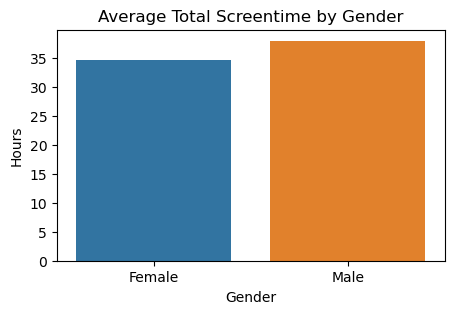

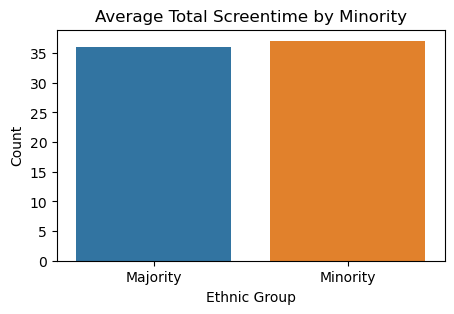

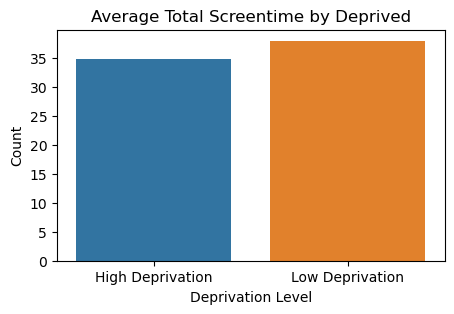

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read datasets into a dataframe
dataset1 = pd.read_csv('dataset1.csv')
dataset2 = pd.read_csv('dataset2.csv') #screentime
dataset3 = pd.read_csv('dataset3.csv') #wellbeing

#merge the datasets on the ID column
merged_data = pd.merge(dataset1,dataset2, on='ID')
merged_data = pd.merge(merged_data, dataset3, on='ID')


screentime_col_wk = ['C_wk', 'G_wk', 'S_wk', 'T_wk']
screentime_col_we = ['C_we', 'G_we', 'S_we', 'T_we']
screentime_col = ['C_wk', 'C_we', 'G_wk', 'G_we', 'S_wk', 'S_we', 'T_wk', 'T_we']

# Columns
required_col = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk',
              'Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'gender', 'minority', 'deprived']

for col in required_col:
   if col not in merged_data.columns:
       raise KeyError(f"Column '{col}' is missing.")

# AVERAGE TOTAL SCREEN TIME BY GENDER, MINORITY AND DEPRIVED
# gender
merged_data['Total_Screentime'] = merged_data[required_col].sum(axis=1)
gender_screentime = merged_data.groupby('gender')['Total_Screentime'].mean().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(x='gender', y='Total_Screentime', data=gender_screentime)
plt.title('Average Total Screentime by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.show()

# minority
minority_screentime = merged_data.groupby('minority')['Total_Screentime'].mean().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(x='minority', y='Total_Screentime', data=minority_screentime)
plt.title('Average Total Screentime by Minority')
plt.xlabel('Ethnic Group')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Majority', 'Minority'])
plt.show()

# deprived
deprived_screentime = merged_data.groupby('deprived')['Total_Screentime'].mean().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(x='deprived', y='Total_Screentime', data=deprived_screentime)
plt.title('Average Total Screentime by Deprived')
plt.xlabel('Deprivation Level')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['High Deprivation', 'Low Deprivation'])
plt.show()